# My dataset + SVM 70/30

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import re


In [2]:
# Load the Excel file
file_path = '../data/SentimentAnalysisMaltese.xlsx'
data = pd.read_excel(file_path)

In [3]:
# Data cleaning: remove rows with NaN values in 'TEXT' or 'SENTIMENT'
cleaned_data = data.dropna(subset=['TEXT', 'SENTIMENT'])

Accuracy: 0.80
Metrics for Negative Sentiment:
 Precision: 0.75
 Recall: 0.86
 F1-Score: 0.80
Metrics for Positive Sentiment:
 Precision: 0.86
 Recall: 0.75
 F1-Score: 0.80


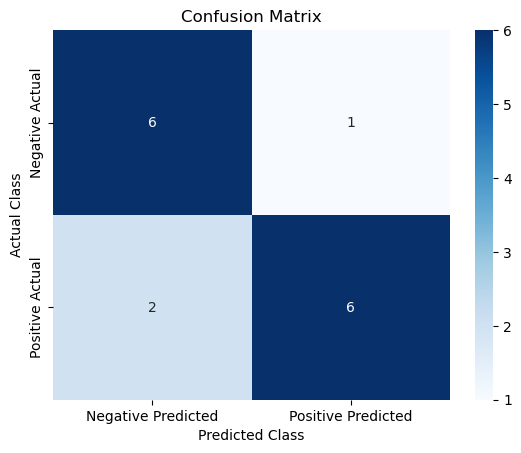

In [4]:
# Basic text preprocessing
def preprocess_text(text):
    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lower case
    text = text.lower()
    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+"," ",text)
    return text

# Applying the preprocessing function to the TEXT column
cleaned_data['TEXT'] = cleaned_data['TEXT'].apply(preprocess_text)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_data['TEXT'], cleaned_data['SENTIMENT'], test_size=0.3, random_state=42)

# Pipeline for TF-IDF Vectorization and SVM Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC(kernel='linear')),  # SVM with linear kernel
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred = pipeline.predict(X_test)

# Metrics calculation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy:.2f}")
print("Metrics for Negative Sentiment:")
print(f" Precision: {report['Negative']['precision']:.2f}")
print(f" Recall: {report['Negative']['recall']:.2f}")
print(f" F1-Score: {report['Negative']['f1-score']:.2f}")
print("Metrics for Positive Sentiment:")
print(f" Precision: {report['Positive']['precision']:.2f}")
print(f" Recall: {report['Positive']['recall']:.2f}")
print(f" F1-Score: {report['Positive']['f1-score']:.2f}")

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative Predicted', 'Positive Predicted'],
            yticklabels=['Negative Actual', 'Positive Actual'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()